# KNN(K Nearest Neighbours) for classification of glass types
We will make use of KNN algorithms to classify the type of glass.

### What is covered?
- About KNN algorithm
- Exploring dataset using visualization - scatterplot,pairplot, heatmap (correlation matrix).
- Feature scaling
- Applying KNN to classify 
- Optimization 
    - Distance metrics
    - Finding the best K value


### About KNN-
- It is an instance-based algorithm.
- As opposed to model-based algorithms which pre trains on the data, and discards the data. Instance-based algorithms retain the data to classify when a new data point is given.
- The distance metric is used to calculate its nearest neighbors (Euclidean, manhattan)
- Can solve classification(by determining the majority class of nearest neighbors) and regression problems (by determining the means of nearest neighbors).
- If the majority of the nearest neighbors of the new data point belong to a certain class, the model classifies the new data point to that class.


![Knn](https://github.com/nagarajbhat/100DaysOfCode/blob/master/classification/KNN_board.PNG)

For example, in the above plot, Assuming k=5, 

the black point 
(new data) can be classified as class 1(Blue), because 3 out 5 of its nearest neighbors belong to class 1.


### Dataset
[Glass classification dataset](https://www.kaggle.com/uciml/glass) . Download to follow along.

**Description** - 

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

- Id number: 1 to 214 (removed from CSV file)
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type of glass: (class attribute)
    - 1 buildingwindowsfloatprocessed 
    - 2 buildingwindowsnonfloatprocessed 
    - 3 vehiclewindowsfloatprocessed
    - 4 vehiclewindowsnonfloatprocessed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

About Type 2,4 -> **Float processed glass** means they are made on a floating molten glass on a bed of molten metal, this gives the sheet uniform thickness and flat surfaces.

## Load dependencies and data

In [407]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


In [408]:
#load data
df = pd.read_csv('./data/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [409]:
# value count for glass types
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Data exploration and visualizaion

#### correlation matrix - 

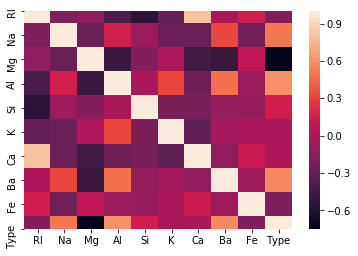

In [399]:
cor = df.corr()
sns.heatmap(cor)

We can notice that Ca and K values don't affect Type that much.

Also Ca and RI are highly correlated, this means using only RI is enough.

So we can go ahead and drop Ca, and also K.(performed later)


## Scatter plot of two features

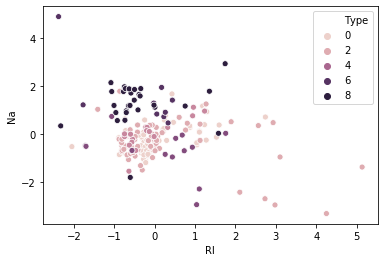

In [401]:
sns.scatterplot(df_feat['RI'],df_feat['Na'],hue=df['Type'])

Suppose we consider only RI, and Na values for classification for glass type.
- From the above plot, We first calculate the nearest neighbors from the new data point to be calculated.
- If the majority of nearest neighbors belong to a particular class, say type 4, then we classify the data point as type 4.


But there are a lot more than two features based on which we can classify.
So let us take a look at pairwise plot to capture all the features.

C:\Users\nagar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\nagar\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


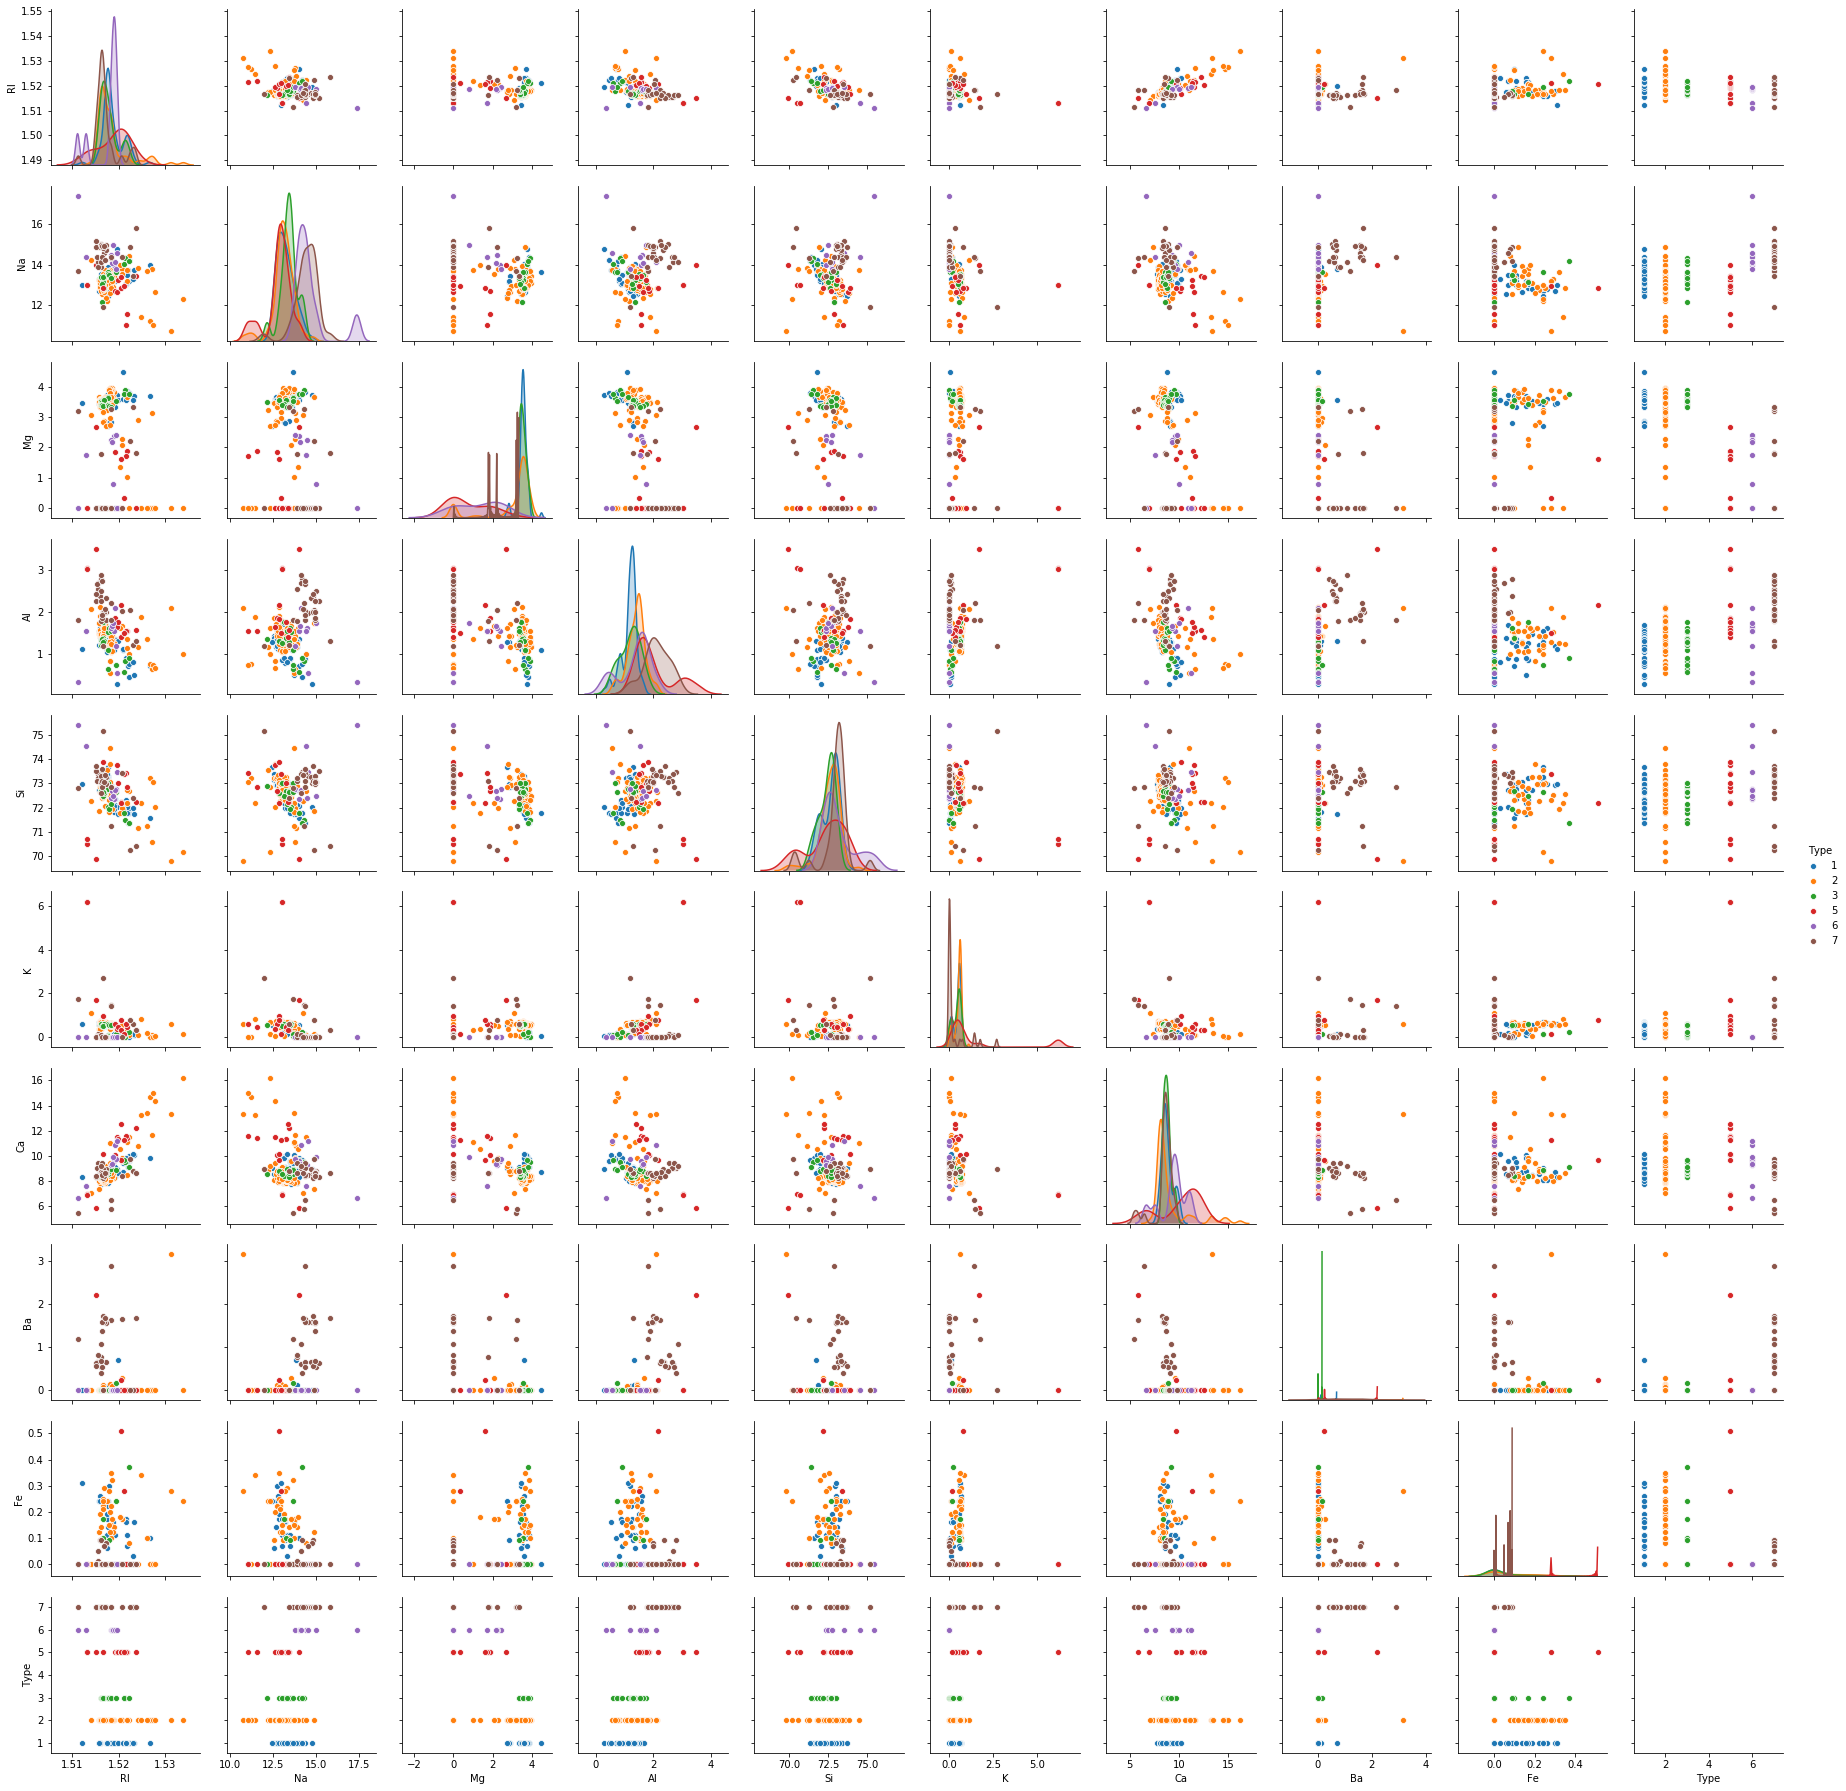

In [430]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

## Feature Scaling 

Scaling is necessary for distance-based algorithms such as KNN.
This is to avoid higher weightage being assigned to data with a higher magnitude.

Using standard scaler we can scale down to unit variance.

**Formula:**

z = (x - u) / s

where x -> value, u -> mean, s -> standard deviation




In [20]:
scaler = StandardScaler()


In [21]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [429]:
#perform transformation
scaled_features = scaler.transform(df.drop('Type',axis=1))
scaled_features


array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [23]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


## Applying KNN

- Drop features that are not required
- Use random state while splitting the data to ensure reproducibility and consistency
- Experiment with distance metrics - Euclidean, manhattan

In [432]:
dff = df_feat.drop(['Ca','K'],axis=1) #Removing features - Ca and K 
X_train,X_test,y_train,y_test  = train_test_split(dff,df['Type'],test_size=0.3,random_state=45) #setting random state ensures split is same eveytime, so that the results are comparable

In [423]:
knn = KNeighborsClassifier(n_neighbors=4,metric='manhattan')

In [424]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [425]:
y_pred = knn.predict(X_test)

In [426]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.90      0.78        20
           2       0.85      0.65      0.74        26
           3       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       0.50      0.50      0.50         2
           7       1.00      0.85      0.92        13

    accuracy                           0.74        65
   macro avg       0.55      0.65      0.56        65
weighted avg       0.77      0.74      0.74        65



In [427]:
accuracy_score(y_test,y_pred)

0.7384615384615385

With this setup, We found the accuracy to be 73.84%

### Finding the best K value
We can do this either -
- by plotting Accuracy
- or by plotting the error rate

Note that plotting both is not required, both are plottted to show as an example.

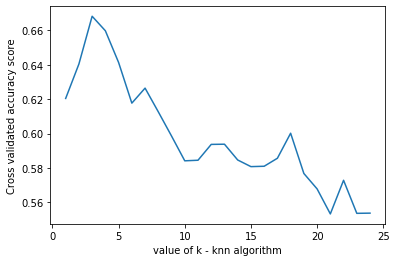

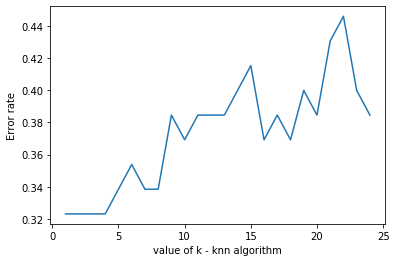

In [428]:
k_range = range(1,25)
k_scores = []
error_rate =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #kscores - accuracy
    scores = cross_val_score(knn,dff,df['Type'],cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    
    #error rate
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred!=y_test))

#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()

#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()





we can see that k=4 produces the most accurate results

## Findings -
- Manhattan distance produced better results (improved accuracy - more than 5%)
- Applying feature scaling improved accuracy by almost 5%.
- The best k value was found to be 4.
- Dropping Ca produced better results by a bit, K value did not affect results in any way.
- Also, we noticed that RI and Ca are highly correlated, 
  this makes sense as it was found that the Refractive index of glass was found to increase with the increase in Cao. (https://link.springer.com/article/10.1134/S1087659614030249)
  
 

## Further improvements - 

We can see that the model can be improved further so we get better accuracy. Some suggestions - 
- Using KFold Cross-validation
- Try different algorithms to find the best one for this problem - (SVM, Random forest, etc)


## Other Useful resources - 
- [K Nearest Neighbour Easily Explained with Implementation by Krish Naik - video](https://www.youtube.com/watch?v=wTF6vzS9fy4)
- [KNN by sentdex -video](https://www.youtube.com/watch?v=1i0zu9jHN6U)
- [KNN sklearn - docs ](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Complete guide to K nearest neighbours - python and R - blog](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)
- [Why scaling is required in KNN and K-Means - blog](https://medium.com/analytics-vidhya/why-is-scaling-required-in-knn-and-k-means-8129e4d88ed7)